In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import yfinance as yf
import datetime

In [3]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2024, 1, 1)

In [4]:
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date 
cisco = yf.download('CSCO', start=start, end=end, progress=False)
ibm = yf.download('IBM', start=start, end=end, progress=False)
amazon = yf.download('AMZN', start=start, end=end, progress=False)
apple = yf.download('AAPL', start=start, end=end, progress=False)

In [5]:
# Create a new DataFrame and store the closing prices of the stocks in the DataFrame
stocks = pd.concat([cisco['Close'], ibm['Close'], amazon['Close'], apple['Close']], axis=1)
stocks.columns = ['CSCO', 'IBM', 'AMZN', 'AAPL']


In [6]:
stocks.head()

,CSCO,IBM,AMZN,AAPL
Date,,,,
2017-01-03,23.814352,112.199348,37.683498,26.891958
2017-01-04,23.672787,113.588478,37.859001,26.861858
2017-01-05,23.727837,113.212708,39.022499,26.998459
2017-01-06,23.775032,113.769669,39.799500,27.299446
2017-01-09,23.735708,112.508018,39.846001,27.549501


In [7]:
stocks.pct_change(1).mean() # 1 is for 1 day

CSCO    0.000550
IBM     0.000321
AMZN    0.001018
AAPL    0.001296
dtype: float64

In [8]:
# Correlation of the stocks
stocks.pct_change(1).corr()

,CSCO,IBM,AMZN,AAPL
CSCO,1.000000,0.555434,0.435851,0.567135
IBM,0.555434,1.000000,0.292756,0.421712
AMZN,0.435851,0.292756,1.000000,0.618141
AAPL,0.567135,0.421712,0.618141,1.000000


In [9]:
stocks.pct_change(1).head() # 1 is for 1 day 


,CSCO,IBM,AMZN,AAPL
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.005945,0.012381,0.004657,-0.001119
2017-01-05,0.002325,-0.003308,0.030732,0.005085
2017-01-06,0.001989,0.004920,0.019912,0.011148
2017-01-09,-0.001654,-0.011090,0.001168,0.009160


In [10]:
# Logarithmic returns
log_ret = np.log(stocks/stocks.shift(1)) # shift moves the data down by 1
log_ret.head()

,CSCO,IBM,AMZN,AAPL
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.005962,0.012305,0.004646,-0.001120
2017-01-05,0.002323,-0.003314,0.030270,0.005072
2017-01-06,0.001987,0.004908,0.019716,0.011087
2017-01-09,-0.001655,-0.011151,0.001168,0.009118


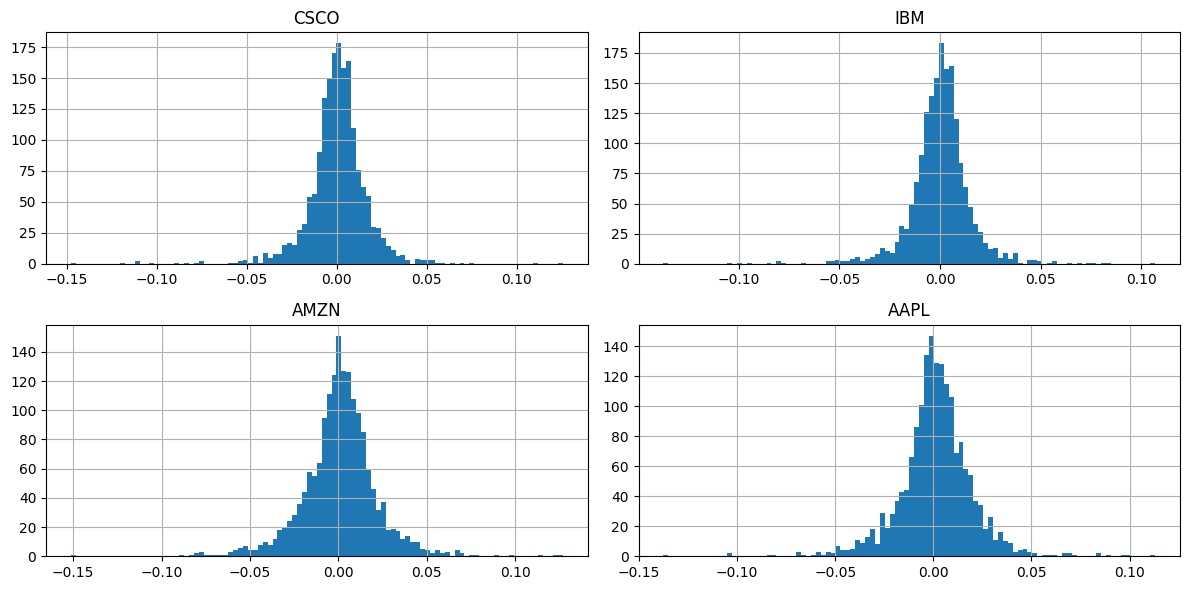

In [11]:
log_ret.hist(bins=100, figsize=(12,6)) # Histogram of the log returns
plt.tight_layout() # To avoid overlapping
plt.show()   # Normally distributed

In [12]:
log_ret.mean() # Mean of the log returns

CSCO    0.000409
IBM     0.000199
AMZN    0.000793
AAPL    0.001116
dtype: float64

In [13]:
log_ret.cov() # Covariance of the log returns

,CSCO,IBM,AMZN,AAPL
CSCO,0.000283,0.000146,0.000156,0.000180
IBM,0.000146,0.000245,0.000098,0.000126
AMZN,0.000156,0.000098,0.000450,0.000249
AAPL,0.000180,0.000126,0.000249,0.000359


In [14]:
log_ret.cov() * 252 # Annualized covariance

,CSCO,IBM,AMZN,AAPL
CSCO,0.071401,0.036776,0.039236,0.045430
IBM,0.036776,0.061829,0.024713,0.031686
AMZN,0.039236,0.024713,0.113278,0.062769
AAPL,0.045430,0.031686,0.062769,0.090526


In [19]:
np.random.seed(101)  # To get the same random numbers

print(stocks.columns)

weight = np.array(np.random.random(4))  # Random weights

print('Random Weights:')
print(weight)

print('Rebalance')
weight = weight / np.sum(weight) # Rebalance the weights
print(weight)

# Expected return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weight) * 252

# Expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov() * 252, weight))) # Transpose of the weight
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)



Index(['CSCO', 'IBM', 'AMZN', 'AAPL'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
Expected Volatility
0.22034352755209566
Sharpe Ratio
0.4786899921203154


In [18]:
np.sum(log_ret.mean() * weight * 252)   # Expected return of each stock

0.10547624146767516

In [20]:
np.random.seed(101)  # To get the same random numbers

num_ports = 5000 # Number of portfolios
all_weights = np.zeros((num_ports, len(stocks.columns))) # Create an array of zeros
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    # Weights
    weight = np.array(np.random.random(4))
    weight = weight / np.sum(weight)
    
    # Save the weights
    all_weights[ind,:] = weight
    
    # Expected return
    ret_arr[ind] = np.sum(log_ret.mean() * weight) * 252

    # Expected volatility
    vol_arr[ind] = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov() * 252, weight))) # Transpose of the weight

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [21]:
sharpe_arr.max() # Maximum Sharpe Ratio

0.9249421870903817

In [22]:
sharpe_arr.argmax() # Index of the maximum Sharpe Ratio

139

In [23]:
all_weights[1419,:] # Weights of the maximum Sharpe Ratio

array([0.25842987, 0.27201764, 0.35299142, 0.11656107])

In [25]:
max_sr_ret = ret_arr[1419] # Return of the maximum Sharpe Ratio
max_sr_vol = vol_arr[1419] # Volatility of the maximum Sharpe Ratio

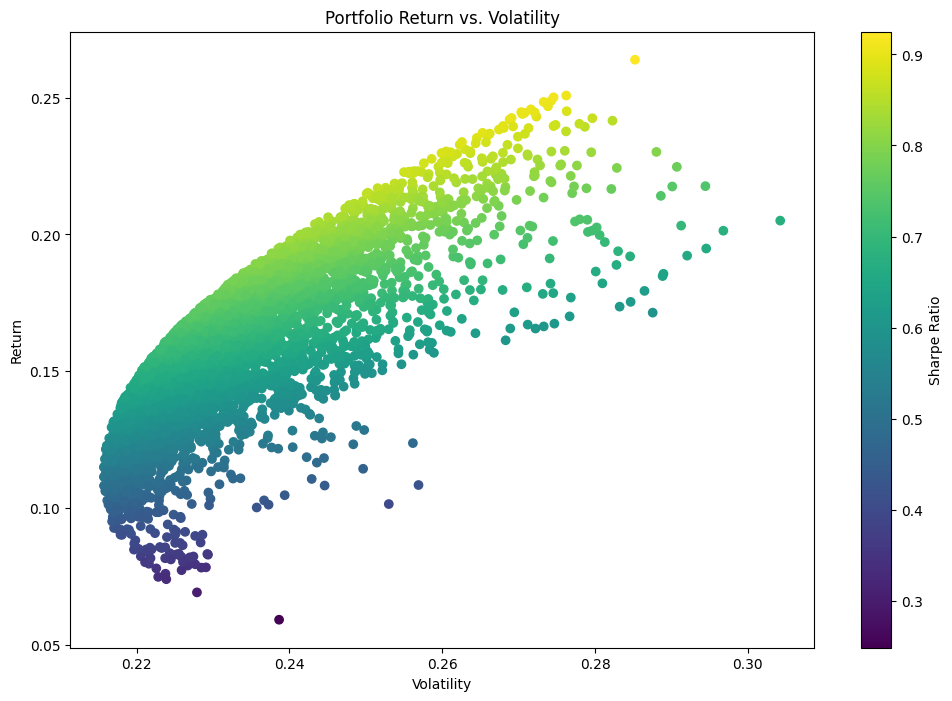

In [24]:
plt.figure(figsize=(12,8)) # Figure size
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis') # Scatter plot
plt.colorbar(label='Sharpe Ratio') # Color bar
plt.xlabel('Volatility') # X label
plt.ylabel('Return') # Y label
plt.title('Portfolio Return vs. Volatility') # Title
plt.show() # Show the plot

In [26]:
# Mathematical optimization for the efficient frontier and the Sharpe Ratio
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

In [27]:
from scipy.optimize import minimize

In [28]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

In [29]:
def neg_sharpe(weights):
    # Returns the negative Sharpe Ratio
    return get_ret_vol_sr(weights)[2] * -1

In [30]:
def check_sum(weights):
    # Returns 0 if the sum of the weights is 1
    return np.sum(weights) - 1

In [31]:
cons = ({'type':'eq','fun': check_sum}) # Constraint for the sum of the weights

In [32]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1)) # Bounds for the weights

In [33]:
init_guess = [0.25, 0.25, 0.25, 0.25] # Initial guess for the weights

In [34]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons) # Optimization  results for the maximum Sharpe Ratio    

In [35]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.9351171465105316
       x: [ 2.233e-17  8.505e-17  2.154e-02  9.785e-01]
     nit: 5
     jac: [ 1.290e-01  1.627e-01  9.618e-04 -2.251e-05]
    nfev: 26
    njev: 5

In [36]:
opt_results.x # Optimal weights for the maximum Sharpe Ratio    

array([2.23345648e-17, 8.50541901e-17, 2.15428558e-02, 9.78457144e-01])

In [37]:
get_ret_vol_sr(opt_results.x) # Return, Volatility, and Sharpe Ratio for the maximum Sharpe Ratio

array([0.27954578, 0.29894199, 0.93511715])

In [38]:
frontier_y = np.linspace(0, 0.3, 100) # Create an array of 100 numbers from 0 to 0.3    

In [39]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1] # Returns the volatility

In [40]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    
    frontier_volatility.append(result['fun'])

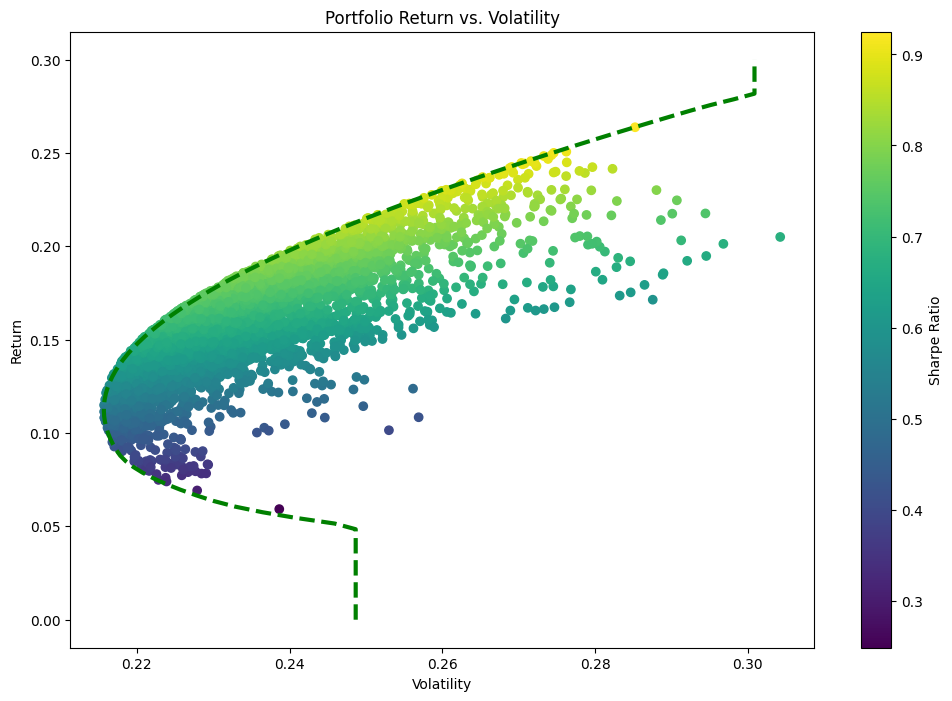

In [41]:
plt.figure(figsize=(12,8)) # Figure size
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis') # Scatter plot
plt.colorbar(label='Sharpe Ratio') # Color bar
plt.xlabel('Volatility') # X label
plt.ylabel('Return') # Y label
plt.title('Portfolio Return vs. Volatility') # Title
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3) # Efficient Frontier
plt.show() # Show the plot
